In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/20-skin-disease-directories-with-face-images/Dataset/test/Light Diseases and Disorders of Pigmentation/melasma-34.jpg
/kaggle/input/20-skin-disease-directories-with-face-images/Dataset/test/Light Diseases and Disorders of Pigmentation/milia-3.jpg
/kaggle/input/20-skin-disease-directories-with-face-images/Dataset/test/Light Diseases and Disorders of Pigmentation/sun-damaged-skin-46.jpg
/kaggle/input/20-skin-disease-directories-with-face-images/Dataset/test/Light Diseases and Disorders of Pigmentation/phototoxic-reactions-doxycycline-3.jpg
/kaggle/input/20-skin-disease-directories-with-face-images/Dataset/test/Light Diseases and Disorders of Pigmentation/sun-damaged-skin-127.jpg
/kaggle/input/20-skin-disease-directories-with-face-images/Dataset/test/Light Diseases and Disorders of Pigmentation/melasma-8.jpg
/kaggle/input/20-skin-disease-directories-with-face-images/Dataset/test/Light Diseases and Disorders of Pigmentation/porphyrias-8.jpg
/kaggle/input/20-skin-disease-direc

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers 
import matplotlib.pyplot as plt

In [3]:
link ='/kaggle/input/20-skin-disease-directories-with-face-images/Dataset/train'

In [4]:
tds = tf.keras.preprocessing.image_dataset_from_directory(
    link,
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
)

Found 2609 files belonging to 19 classes.


In [5]:
class_names = tds.class_names
class_names

['Acne and Rosacea Photos',
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
 'Atopic Dermatitis Photos',
 'Cellulitis Impetigo and other Bacterial Infections',
 'Eczema Photos',
 'Exanthems and Drug Eruptions',
 'Herpes HPV and other STDs Photos',
 'Light Diseases and Disorders of Pigmentation',
 'Lupus and other Connective Tissue diseases',
 'Melanoma Skin Cancer Nevi and Moles',
 'Poison Ivy Photos and other Contact Dermatitis',
 'Psoriasis pictures Lichen Planus and related diseases',
 'Seborrheic Keratoses and other Benign Tumors',
 'Systemic Disease',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
 'Urticaria Hives',
 'Vascular Tumors',
 'Vasculitis Photos',
 'Warts Molluscum and other Viral Infections']

In [6]:
len(tds)

82

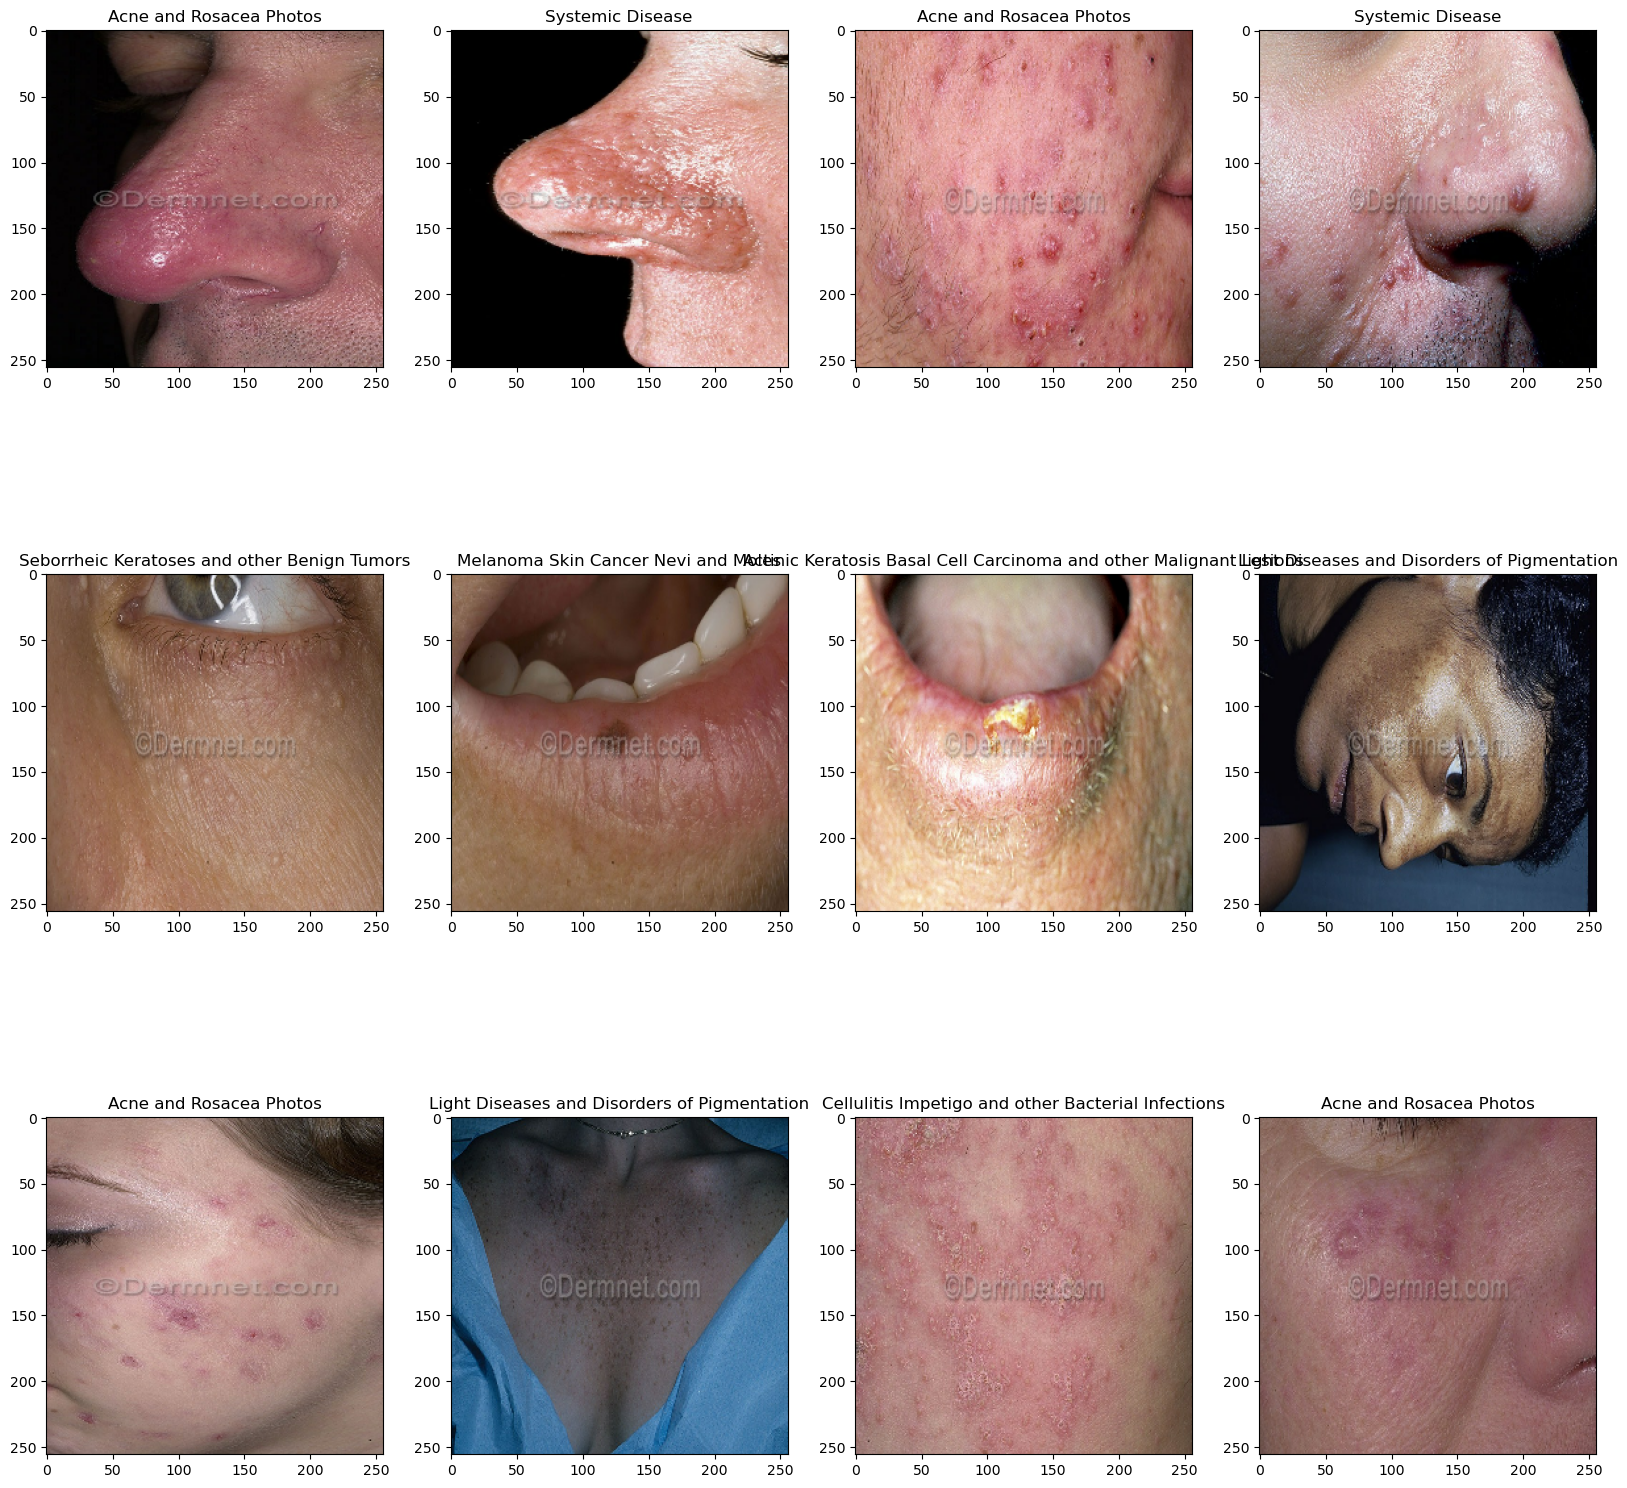

In [7]:
plt.figure(figsize=(20,20))
for img_batch , lable_batch in tds.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(img_batch[i].numpy().astype('uint8') )
        plt.title(class_names[lable_batch[i]])

In [8]:
test_link ="/kaggle/input/20-skin-disease-directories-with-face-images/Dataset/test"

In [9]:
tsds= tf.keras.preprocessing.image_dataset_from_directory(
    test_link,
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
)

Found 897 files belonging to 20 classes.


In [10]:
val_size = 0.10
len(tsds)*val_size

2.9000000000000004

In [11]:
vds = tsds.take(3)
len(vds)

3

In [12]:
tsds = tsds.skip(3)
len(tsds)

26

In [13]:
tds = tds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
tsds = tsds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
vds = vds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [14]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])